In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

# Import all curve reparametrization functions
from deepshape.curves import *

# Set plotting Parameters
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 16
plt.rcParams["xtick.labelsize"] = 16
plt.rcParams["ytick.labelsize"] = 16

In [26]:
# Analytic diffeomorphism
g = LogStepDiff()

# Define Curves 
c1 = Infinity()  # See deepshape.curves.curves for definition.
c2 = c1.compose(g)

# c1 = Circle()
# c2 = HalfCircle()

# Get Qmaps (reparametrize c1 into c2(x) = c1(g(x)))
q, r = Qmap(c2), Qmap(c1)
q, r = SRVT(c2), SRVT(c1)

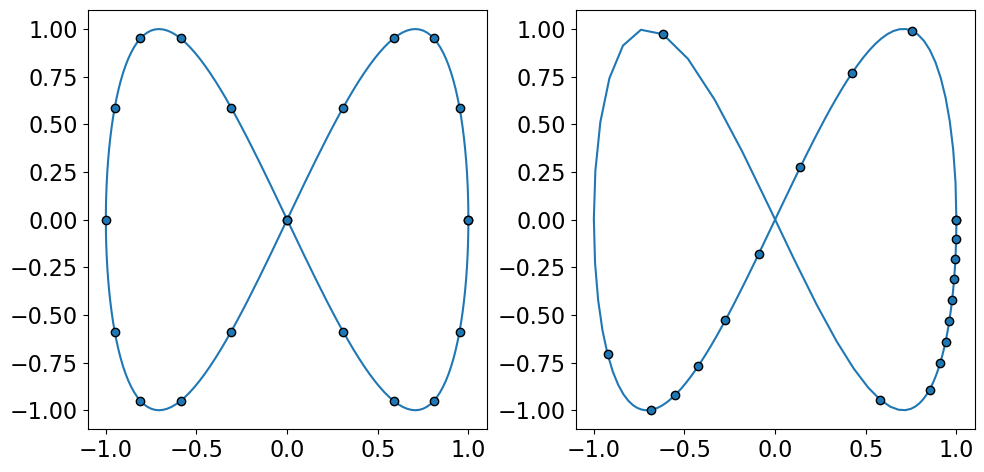

In [27]:
plt.figure(figsize=(10, 5))
plt.subplot(121)
plot_curve(c1, dotpoints=21, ax=plt.gca())
plt.subplot(122)
plot_curve(c2, dotpoints=21, ax=plt.gca())
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_curve(c1, npoints=501, ax=ax, dotpoints=41)
ax.set_aspect('equal')
ax.set_yticks([-1, 0, 1])
ax.set_xticks([-1, 0, 1])
fig.savefig("../figures/curves-reparametrization/curve-infinity-qmap-subject.pdf", bbox_inches="tight")

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
plot_curve(c2, npoints=401, ax=ax, dotpoints=41)
ax.set_aspect('equal')
ax.set_yticks([-1, 0, 1])
ax.set_xticks([-1, 0, 1])
fig.savefig("../figures/curves-reparametrization/curve-infinity-qmap-target.pdf", bbox_inches="tight")

[Iter     1] loss: 12.873492
[Iter     2] loss: 10.711619
[Iter     3] loss: 9.964262
[Iter     4] loss: 7.623825
[Iter     5] loss: 5.091469
[Iter     6] loss: 3.728456
[Iter     7] loss: 3.190365
[Iter     8] loss: 2.089064
[Iter     9] loss: 1.236128
[Iter    10] loss: 0.338279
[Iter    11] loss: 0.247525
[Iter    12] loss: 0.211087
[Iter    13] loss: 0.126357
[Iter    14] loss: 0.070788
[Iter    15] loss: 0.023330
[Iter    16] loss: 0.017227
[Iter    17] loss: 0.015038
[Iter    18] loss: 0.006771
[Iter    19] loss: 0.005260
[Iter    20] loss: 0.004718
[Iter    21] loss: 0.004388
[Iter    22] loss: 0.003852
[Iter    23] loss: 0.003375
[Iter    24] loss: 0.002885
[Iter    25] loss: 0.002539
[Iter    26] loss: 0.002267
[Iter    27] loss: 0.002141
[Iter    28] loss: 0.002075
[Iter    29] loss: 0.001938
[Iter    30] loss: 0.001847
[Iter    31] loss: 0.001700
[Iter    32] loss: 0.001672
[Iter    33] loss: 0.001644
[Iter    34] loss: 0.001533
[Iter    35] loss: 0.001319
[Iter    36] loss:

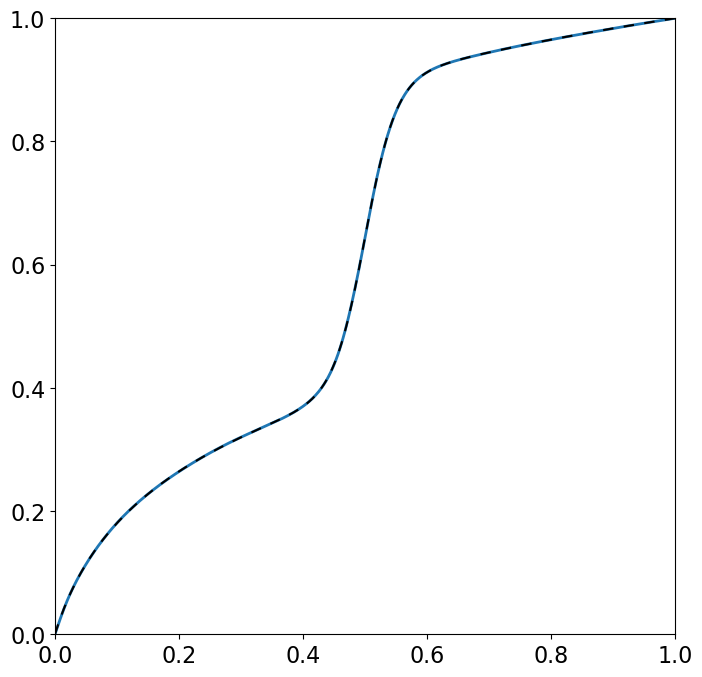

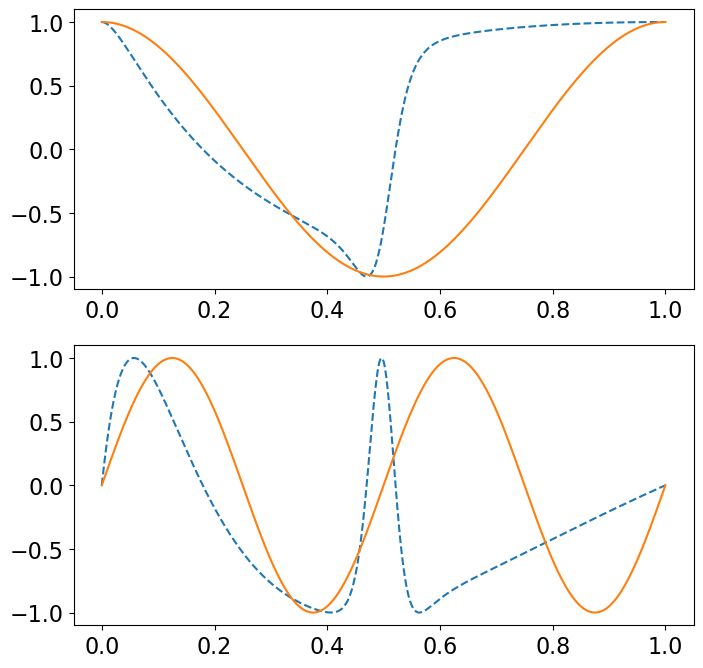

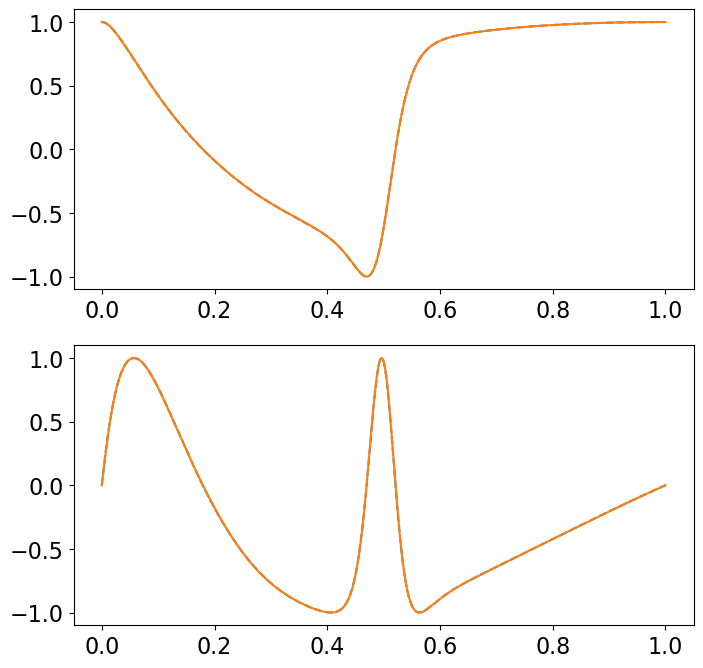

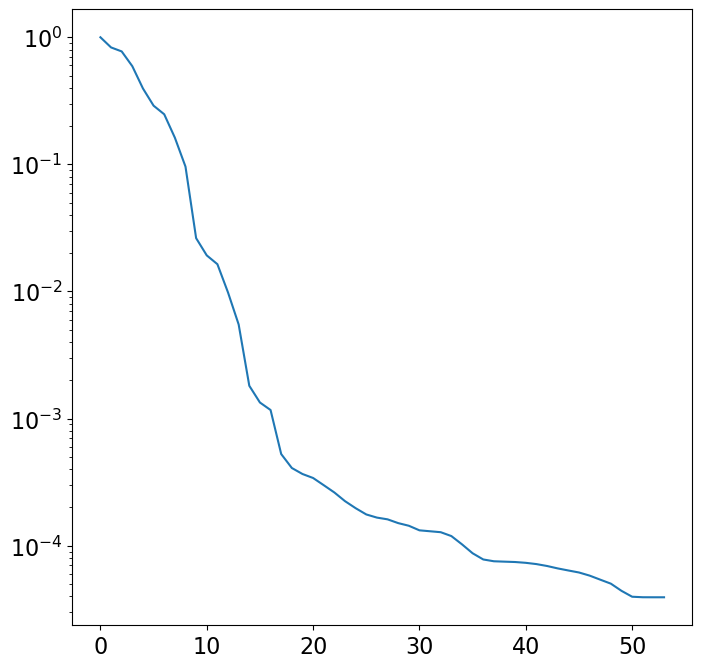

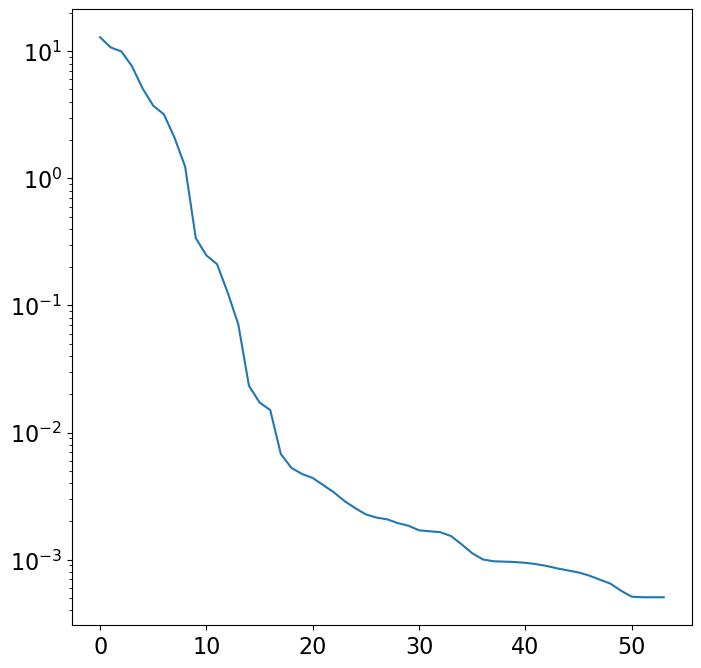

In [41]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
# Create reparametrization network
RN = CurveReparametrizer([
    SineSeries(10) for i in range(5)
])

# Define loss function
loss_func = CurveDistance(q, r, k=1024)


# Choose and configure optimizer.
optimizer = optim.LBFGS(RN.parameters(), lr=1., max_iter=200, line_search_fn='strong_wolfe')
scheduler = None


# optimizer = optim.Adam(RN.parameters(), lr=1e-5)
# scheduler = optim.lr_scheduler.ReduceLROnPlateau(
#     optimizer, mode='min', factor=0.5, patience=10, threshold=0.,
#     threshold_mode='rel', cooldown=1, min_lr=1e-6, eps=1e-08,
#     verbose=True)


# Train with BFGS-optimizer
error = reparametrize(RN, loss_func, optimizer, 200, Logger(1), scheduler=scheduler)


x, z, _, _, _ = get_plot_data(q, r, RN, 1024)

# Plot Diffeomorphism...
plt.figure(figsize=(8, 8))
plt.plot()
plt.plot(x, z, lw=2)
plt.plot(x, g(x), ls="--", c="black", dashes=(5, 5))
# plt.title("Comparison of True vs. Found Reparametrization")
# plt.legend()
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.savefig("../figures/curves-reparametrization/diffeomorphisms.pdf", bbox_inches="tight")
plt.show()

# Get coordinates befora and after reparametrization
C1, C2, C3 = c1(x), c2(x), c1(z)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C1[:, 0])


ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C1[:, 1])
plt.savefig("../figures/curves-reparametrization/components-before.pdf", bbox_inches="tight")
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C3[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C3[:, 1])
plt.savefig("../figures/curves-reparametrization/components-after.pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 8))
plt.semilogy(error / error[0] )
plt.savefig("../figures/curves-reparametrization/error-rel.pdf", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8, 8))
plt.semilogy(error )
plt.savefig("../figures/curves-reparametrization/error-abs.pdf", bbox_inches="tight")
plt.show()

__Repeated using GPU (if available) for a large network takes more time, but allows very small errors.__

In [10]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Create reparametrization network
RN = CurveReparametrizer([
    SineSeries(100) for _ in range(100)
]).to(device)

# Define loss function
loss_func = CurveDistance(q, r, k=2048).to(device)

# Choose and configure optimizer.
optimizer = optim.LBFGS(RN.parameters(), lr=1.0, max_iter=200, line_search_fn='strong_wolfe')

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=2, threshold=0.,
    threshold_mode='rel', cooldown=10, min_lr=1e-6, eps=1e-08,
    verbose=True)

# Train with BFGS-optimizer
error = reparametrize(RN, loss_func, optimizer, 100, Logger(5))#, scheduler=scheduler)

RN.to("cpu")
loss_func.to("cpu")

x, z, _, _, _ = get_plot_data(q, r, RN, 1024)

# Plot Diffeomorphism...
plt.figure(figsize=(8.4, 5.6))
plt.plot(x, z, label="Found", lw=1.5)
plt.plot(x, g(x), label="Analytic", ls="--", c="black", lw=1)
plt.title("Comparison of True vs. Found Reparametrization")
plt.legend()
plt.show()

# Get coordinates befora and after reparametrization
C1, C2, C3 = c1(x), c2(x), c1(z)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C1[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C1[:, 1])
plt.show()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8.3, 5.6))
ax1.plot(x, C2[:, 0], ls="dashed")
ax1.plot(x, C3[:, 0])

ax2.plot(x, C2[:, 1], ls="dashed")
ax2.plot(x, C3[:, 1])
plt.show()

plt.figure()
plt.semilogy(error)
plt.show()

RuntimeError: Expected condition, x and y to be on the same device, but condition is on cuda:0 and x and y are on cpu and cuda:0 respectively